<a href="https://colab.research.google.com/github/AlexandreOrmandes/Analise_banco_de_dados_imobiliario_de_Boston/blob/main/Profiss%C3%A3o_Cientista_de_Dados_M11_assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)

boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns
boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
1,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
2,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
3,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
4,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
491,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
492,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
493,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# Pegar todas as colunas exceto 'MEDV'
X = boston.drop(columns=['MEDV'])

# Pegar apenas a coluna 'MEDV'
y = boston['MEDV']

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27
1,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
2,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
3,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
4,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [7]:
y.head()

0    18.9
1    21.7
2    20.4
3    18.2
4    19.9
Name: MEDV, dtype: float64

In [8]:
# Verificar as dimensões de X e y
X_shape = X.shape
y_shape = y.shape

# Verificar os tipos de X e y
X_type = type(X)
y_type = type(y)

X_shape, y_shape, X_type, y_type

((495, 13), (495,), pandas.core.frame.DataFrame, pandas.core.series.Series)

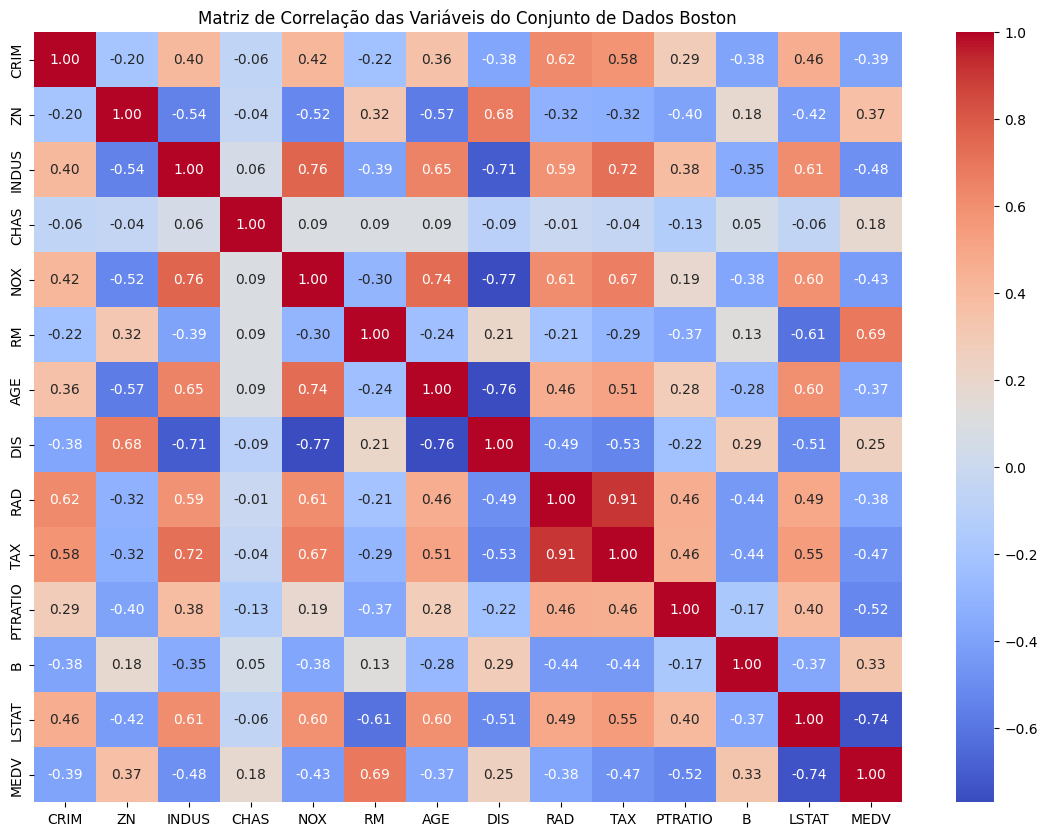

In [11]:
# Calcular a matriz de correlação
correlation_matrix = boston.corr()

# Visualizar a matriz de correlação usando heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis do Conjunto de Dados Boston")
plt.show()

In [12]:
# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões dos conjuntos de treinamento e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((396, 13), (99, 13), (396,), (99,))

In [13]:
# Treinar a árvore de decisão com a melhor configuração encontrada: profundidade máxima = 8 e número mínimo de itens por folha = 9
best_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, random_state=42)
best_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, random_state=42)

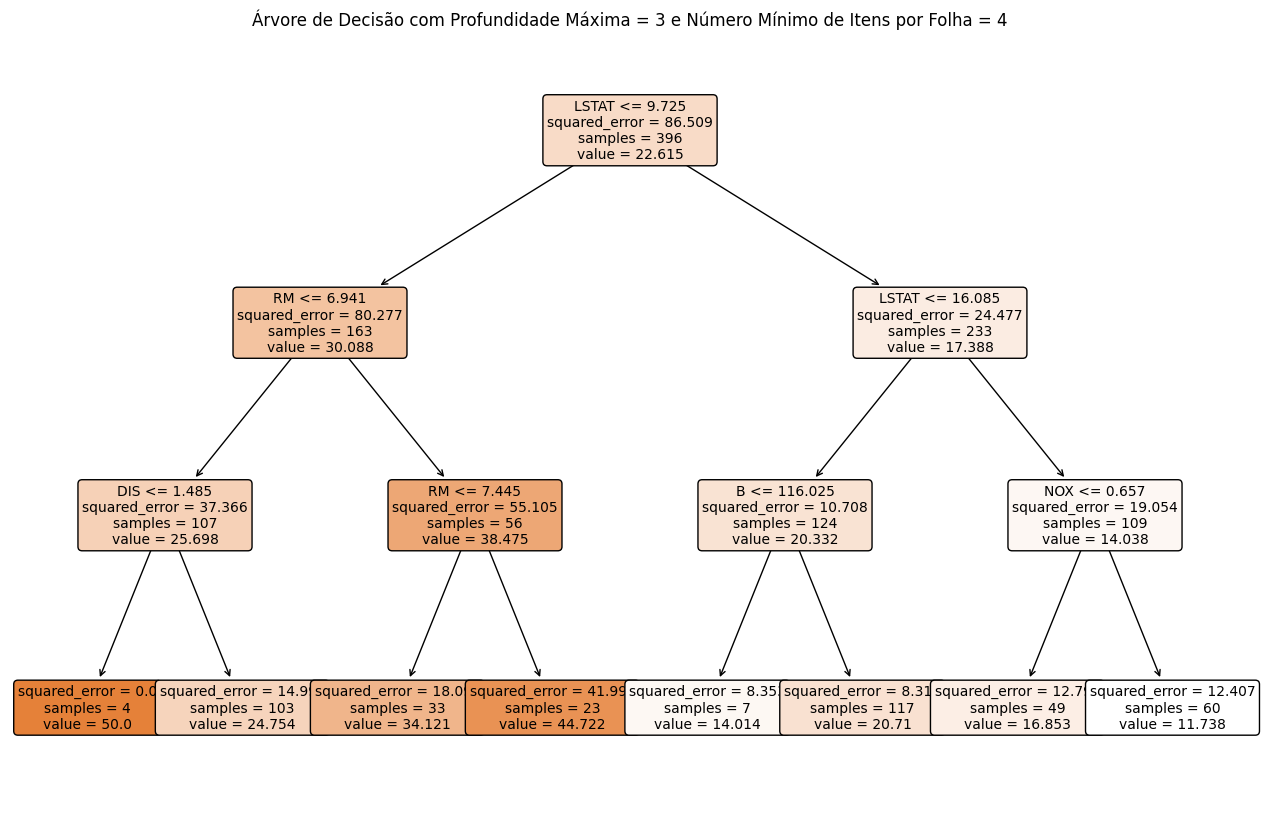

In [16]:
# Visualizar a árvore de decisão com a melhor configuração
plt.figure(figsize=(16, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("Árvore de Decisão com Profundidade Máxima = 3 e Número Mínimo de Itens por Folha = 4")
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

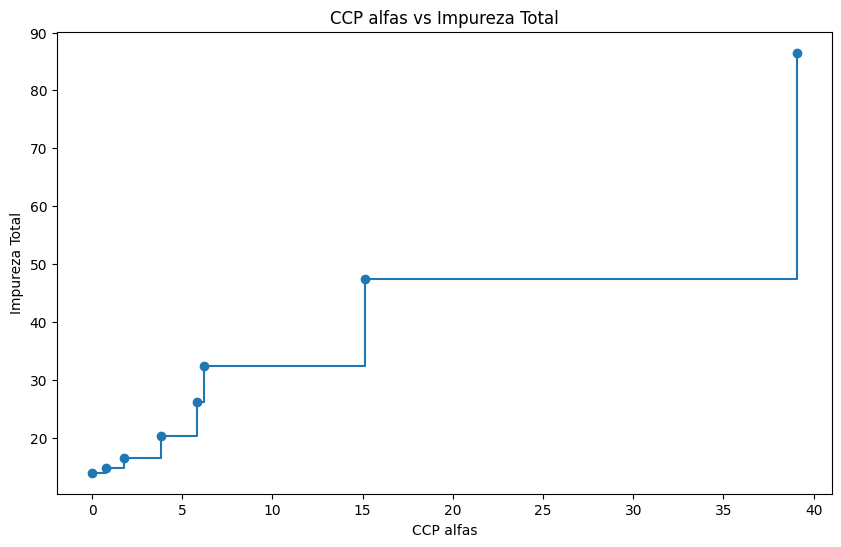

In [17]:
# Calculando os CCP-alfas (Cost Complexity Pruning alphas) para a árvore de decisão treinada
# O método cost_complexity_pruning_path retorna os valores de alfa e as impurezas correspondentes
path = best_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plotando os valores de CCP-alfas contra a impureza total das folhas
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("CCP alfas")
plt.ylabel("Impureza Total")
plt.title("CCP alfas vs Impureza Total")
plt.show()


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [18]:
# Lista para armazenar as árvores treinadas com diferentes valores de CCP-alfa
trees = []

# Treinando uma árvore de decisão para cada valor de CCP-alfa e armazenando na lista
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Verificando o número de árvores treinadas
len(trees)


8

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [21]:
# Lista para armazenar os valores de MSE (Mean Squared Error) para cada árvore
mse_values = []

# Calculando o MSE para cada árvore treinada com diferentes valores de CCP-alfa
for tree in trees:
    y_pred = tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Visualizando os valores de MSE calculados para cada árvore
mse_values

[15.744208333099934,
 15.653859619543558,
 16.0902997796112,
 23.170711421655206,
 27.71170163419427,
 28.17004573255841,
 47.93474627921754,
 79.25268748086931]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

(15.653859619543558, 0.7478149091052182)

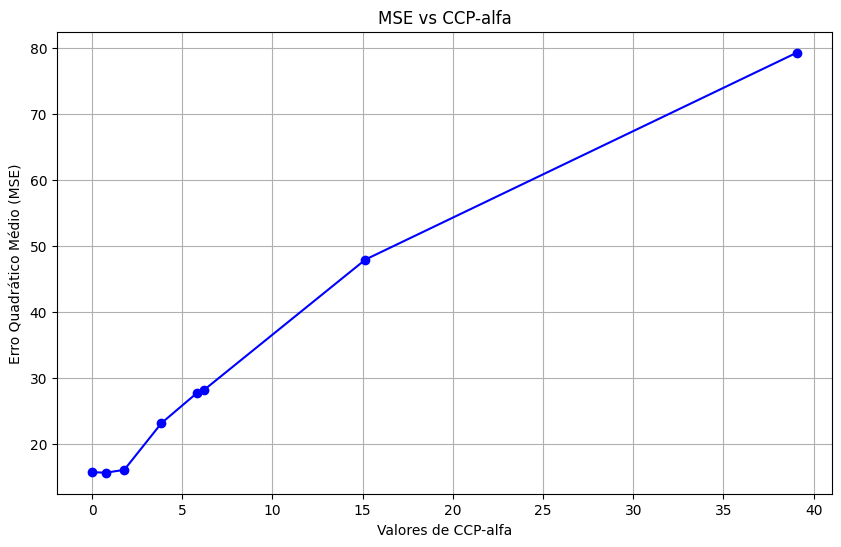

In [22]:
# Plotando os valores de MSE em função dos valores de CCP-alfa
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel("Valores de CCP-alfa")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("MSE vs CCP-alfa")
plt.grid(True)

# Identificando o valor de CCP-alfa que resulta no menor MSE
min_mse = min(mse_values)
min_mse_alpha = ccp_alphas[mse_values.index(min_mse)]

min_mse, min_mse_alpha



1. Com base na análise do gráfico "CCP alfas vs Impureza Total", acredito que um valor de CCP-alfa em torno de 0.156 seja a opção mais equilibrada para o modelo de árvore de decisão. Essa escolha visa minimizar o risco de overfitting, permitindo que o modelo generalize melhor para novos dados.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [23]:
# Treinando a árvore de decisão com o valor ótimo de CCP-alfa encontrado
optimal_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, random_state=42, ccp_alpha=min_mse_alpha)
optimal_tree.fit(X_train, y_train)

# Calculando o R-quadrado (R^2) da árvore no conjunto de teste
r_squared = optimal_tree.score(X_test, y_test)

r_squared


0.8011582868170487

1. O valor de (R-quadrado) para a árvore de decisão treinada com o valor ótimo de CCP-alfa (α≈0.748) é aproximadamente 0.801. Este é um valor relativamente alto, indicando que a árvore de decisão explica cerca de 80.1% da variância na variável alvo
MEDV no conjunto de teste.

### 7. Visualize esta árvore.

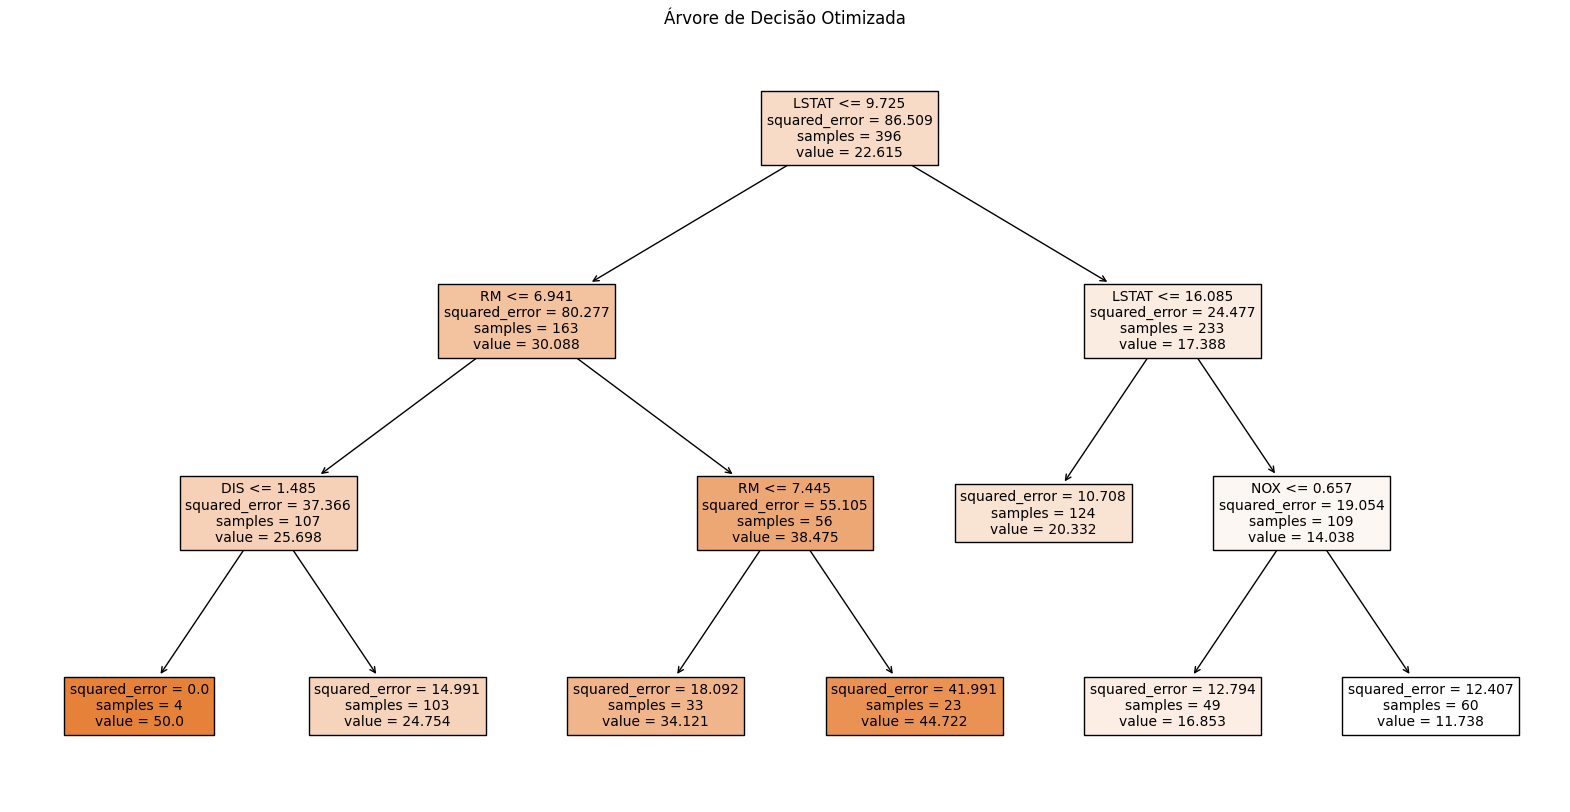

In [24]:
# Visualizando a árvore de decisão otimizada
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Árvore de Decisão Otimizada")
plt.show()


1.
Com base na estrutura da árvore de decisão e nas descrições das variáveis:

2. LSTAT (%status inferior da população): Esta variável aparece na raiz da árvore, indicando que é a mais importante na previsão do valor médio das casas (MEDV). Uma menor proporção de status inferior na população está associada a valores mais altos das casas.

3. RM (número médio de quartos por habitação): Aparece como a segunda variável mais importante, especialmente para casas em áreas com menor LSTAT. Mais quartos geralmente significam um valor mais alto da casa.

4. DIS (distâncias ponderadas até centros de empregos): Também tem um papel, mas em um segmento mais específico da população (baixo LSTAT e RM abaixo de um certo limite).

5. NOX (Concentração de óxido nítrico): Aparece em um nó mais abaixo na árvore, indicando que tem um papel menos significativo, mas ainda relevante, especialmente para casas em áreas com maior LSTAT.

---


 1. Árvore de decisão otimizada pode ser usada para várias finalidades:

 2. Segmentação de Mercado:

   Casas em áreas com baixo LSTAT e alto RM tendem a ter valores mais altos.
   
   Casas em áreas com alto LSTAT e alta concentração de NOX tendem a ter valores mais baixos.


3. Insights para Políticas Públicas e Decisões de Negócio:
   
   Focar em melhorar o status socioeconômico da população (LSTAT) e a qualidade das habitações (RM) pode ter um impacto positivo nos valores das casas.

   A proximidade a centros de emprego (DIS) também pode ser um fator a considerar em desenvolvimentos imobiliários.